# Required packages

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, classification_report
from imblearn.over_sampling import ADASYN

# Import dataset

In [151]:
data = pd.read_csv("D:\หางาน\Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# EDA

In [152]:
data.shape

(10000, 14)

In [153]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [154]:
data.duplicated().sum()

0

In [155]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [157]:
data = data.drop(labels=['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [158]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [159]:
data["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

# Visualization

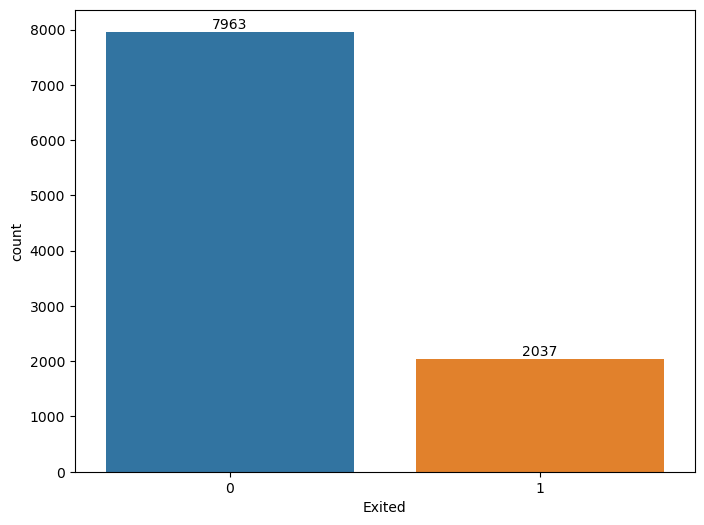

In [160]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='Exited', data=data)
for container in ax.containers:
        ax.bar_label(container)

plt.show()

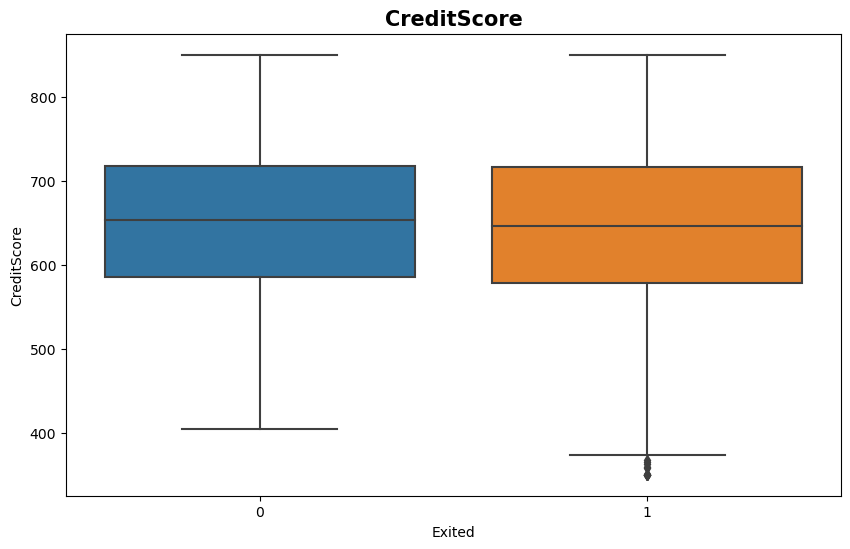

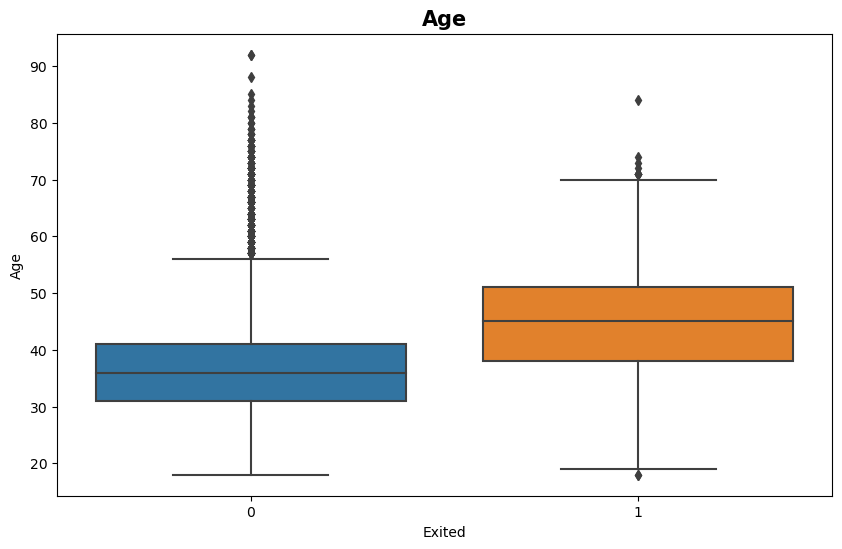

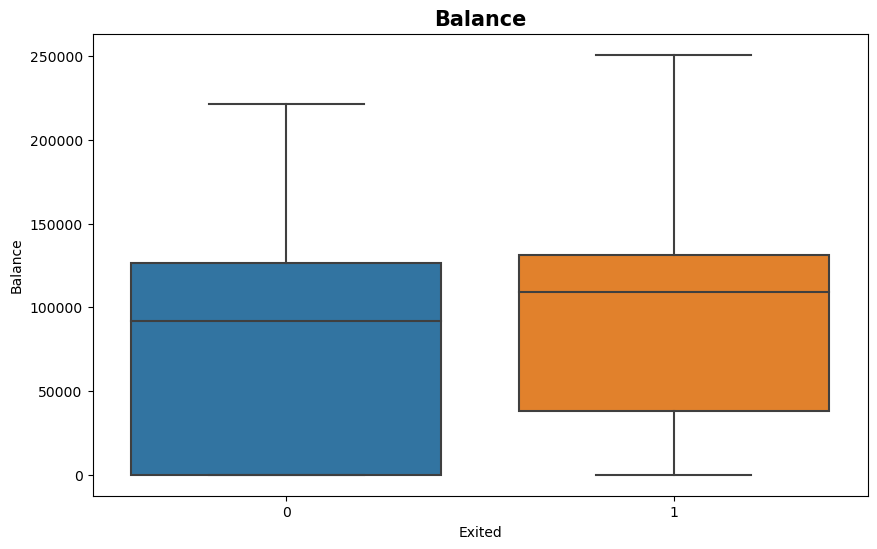

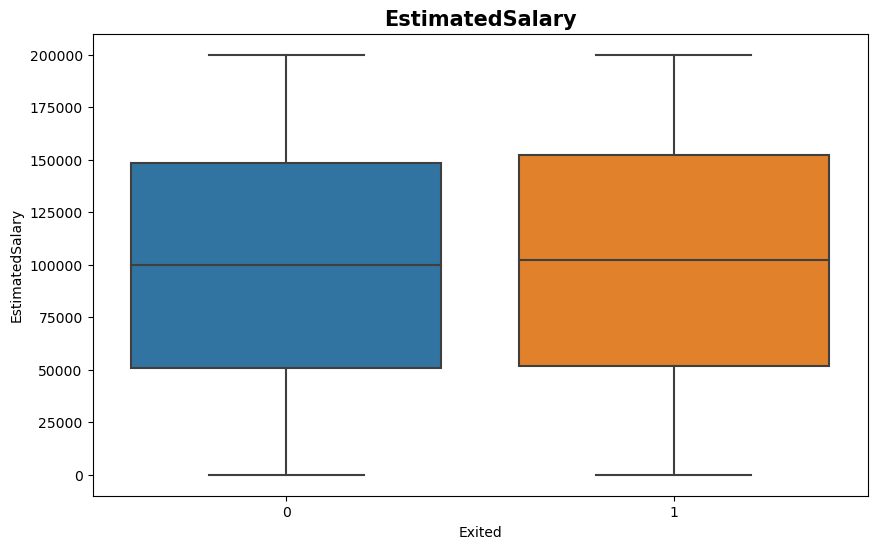

In [161]:
con_feas = data[["CreditScore","Age","Balance","EstimatedSalary"]]
for feature in con_feas:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=data, x='Exited', y=feature)
    
    plt.title(feature,fontsize=15, weight='bold')
    plt.show

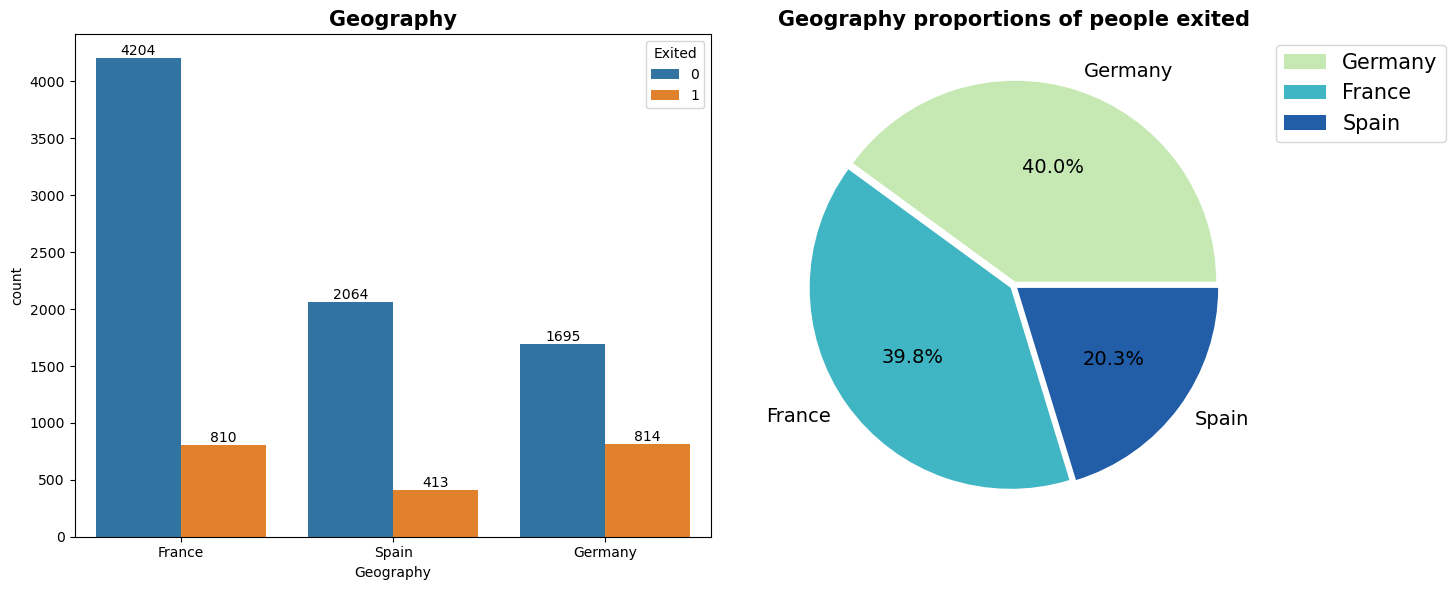

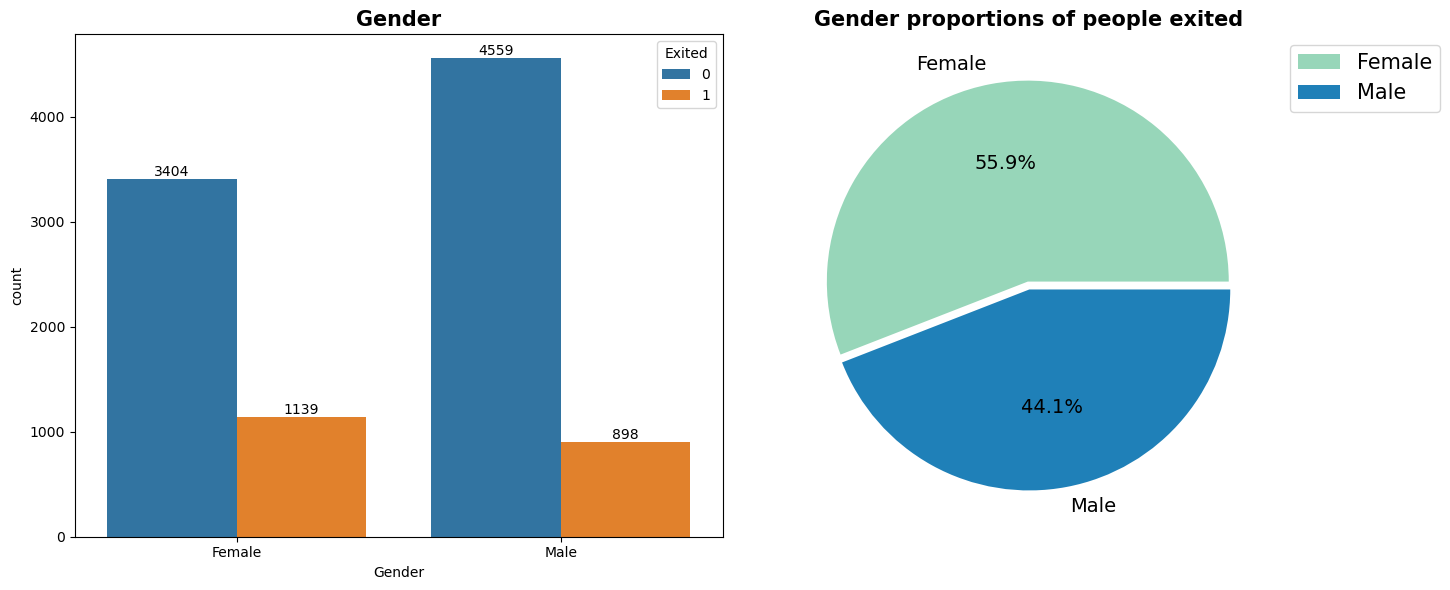

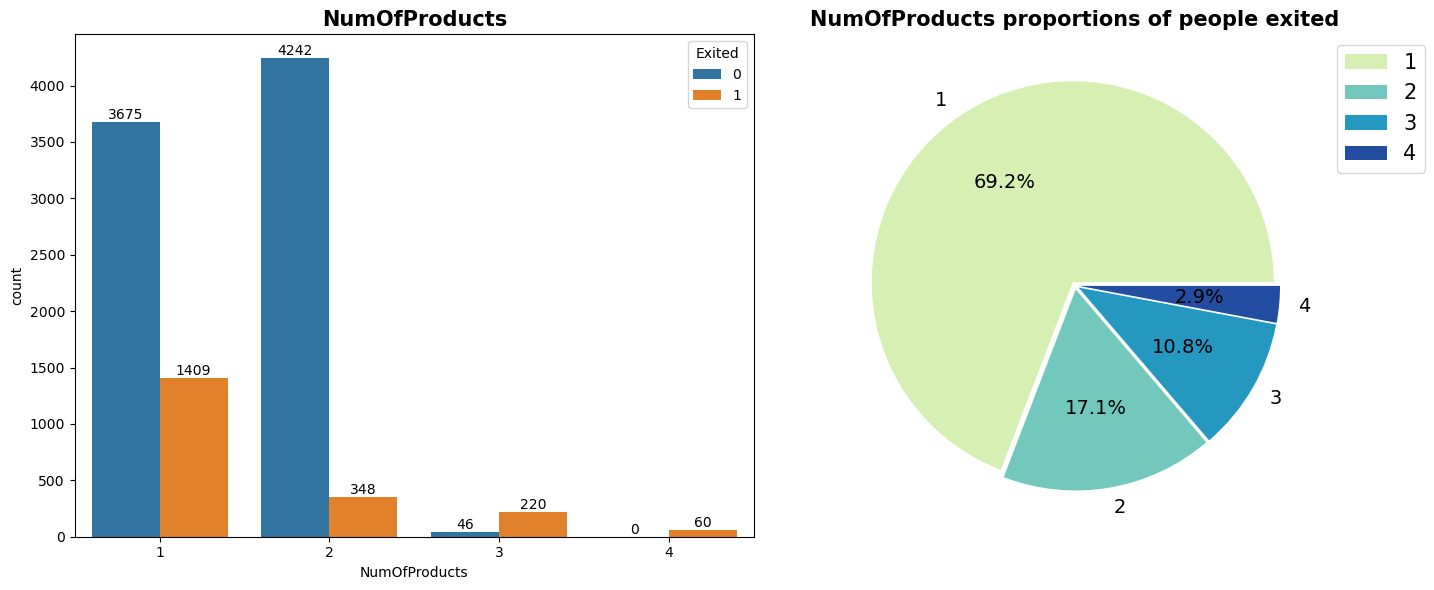

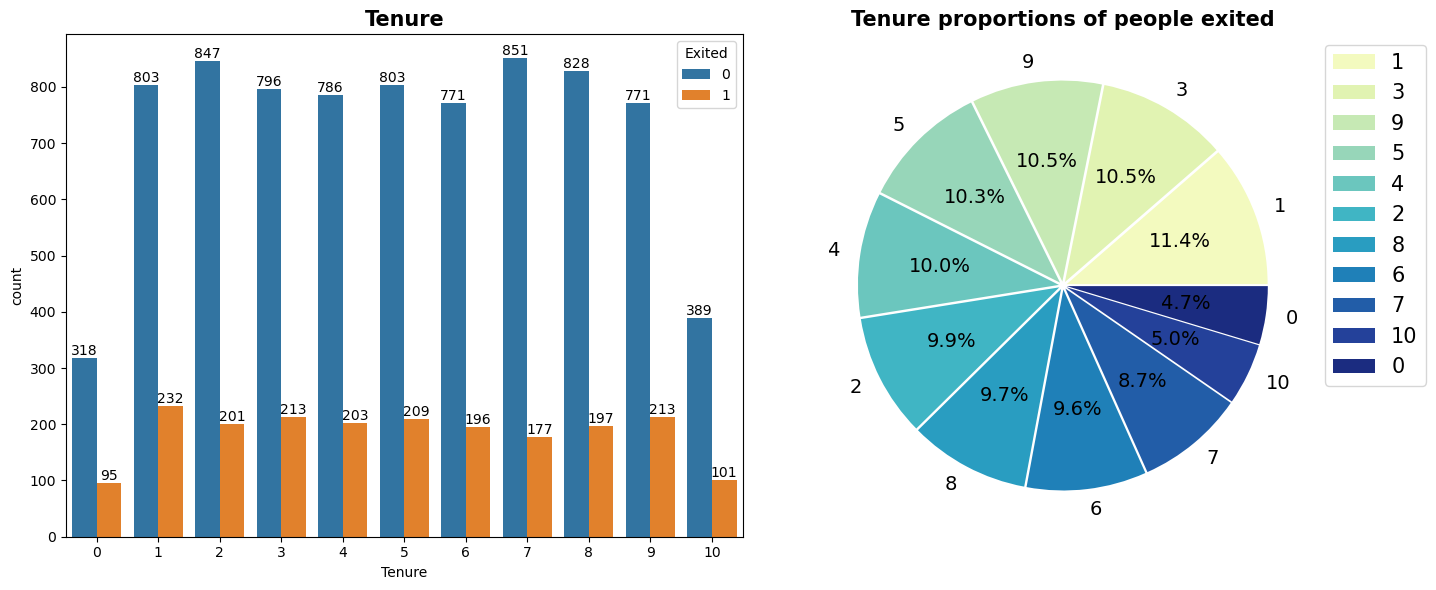

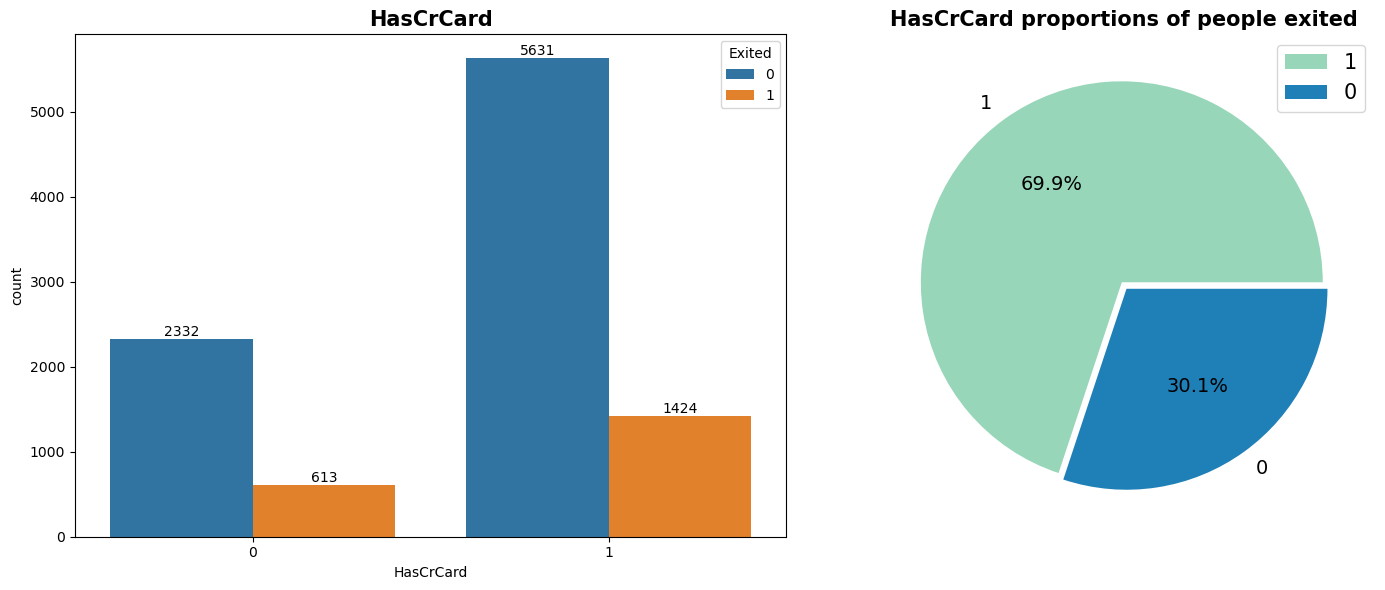

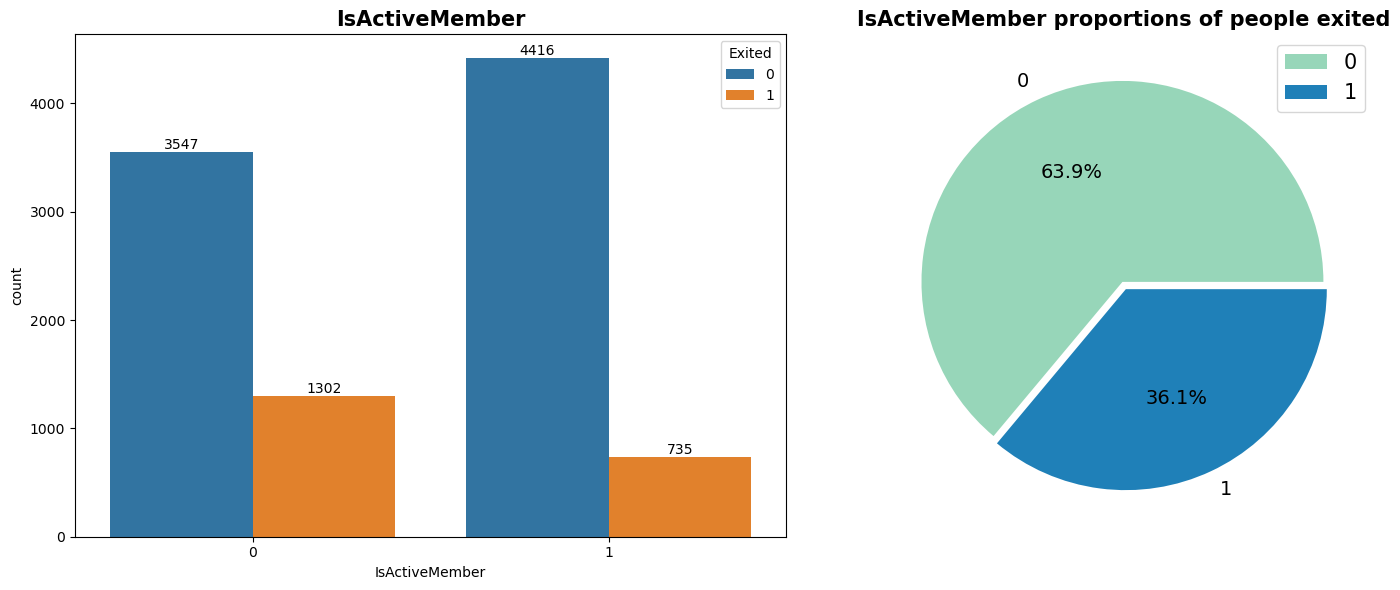

In [162]:
cate_feas = data[['Geography', 'Gender', 'NumOfProducts', 'Tenure', 'HasCrCard', 'IsActiveMember']]
for feature in cate_feas:
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    ax = sns.countplot(data=data, x=feature, hue='Exited', ax=axes[0])
    for container in axes[0].containers:
        axes[0].bar_label(container)
    axes[0].set_title(f'{feature}',weight = 'bold',fontsize = 15)

    
    size = data[feature][data['Exited'] == 1].value_counts().values.tolist()
    label = data[feature][data['Exited'] == 1].value_counts().index
    pal = sns.color_palette("YlGnBu", len(data.groupby(feature).size()))
    axes[1].pie(size, labels=label, colors = pal, autopct='%1.1f%%', textprops={'fontsize': 14},
                explode=[0.02 for _ in range(len(label))])
    axes[1].set_title(f'{feature} proportions of people exited',weight = 'bold',fontsize = 15)
    
    plt.legend(bbox_to_anchor=(1, 1) , prop={'size': 15})
    plt.tight_layout()
    plt.show()
    



C:\Users\OAT\AppData\Local\Temp\ipykernel_17480\1497155554.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

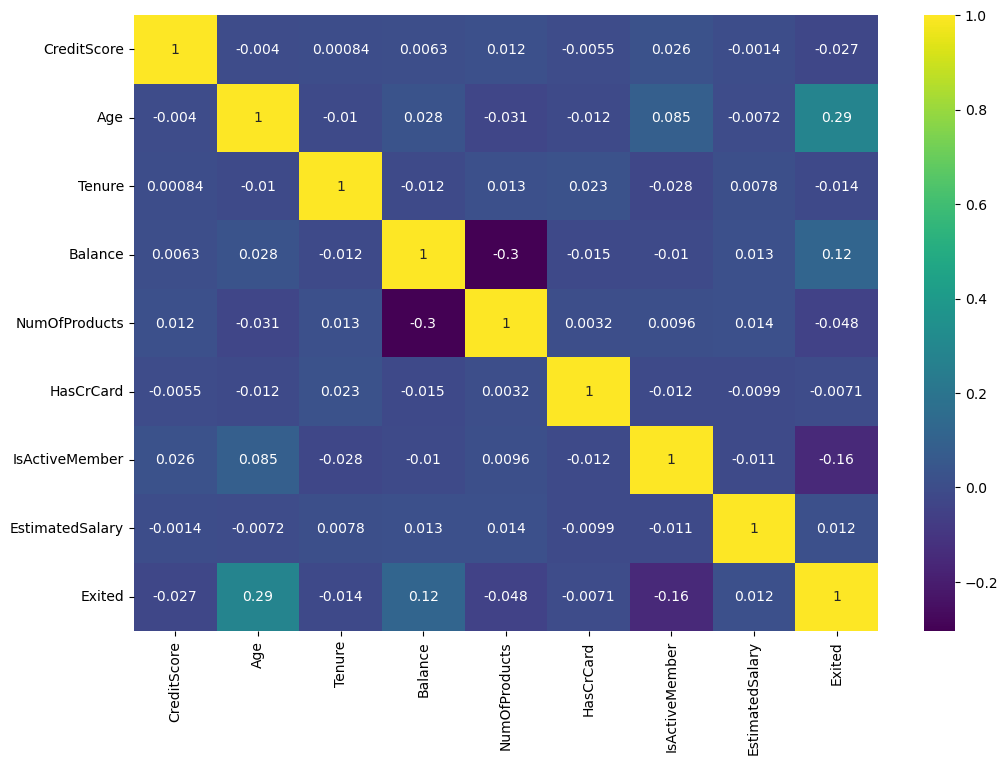

In [163]:
corr = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot = True, cmap = "viridis")

# One Hot Encoding

In [164]:
cate_feas = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
data_onehot = pd.get_dummies(data, columns = cate_feas)

data_onehot

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,619,42,2,0.00,1,101348.88,1,1,0,0,1,0,0,1,0,1
1,608,41,1,83807.86,1,112542.58,0,0,0,1,1,0,1,0,0,1
2,502,42,8,159660.80,3,113931.57,1,1,0,0,1,0,0,1,1,0
3,699,39,1,0.00,2,93826.63,0,1,0,0,1,0,1,0,1,0
4,850,43,2,125510.82,1,79084.10,0,0,0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,96270.64,0,1,0,0,0,1,0,1,1,0
9996,516,35,10,57369.61,1,101699.77,0,1,0,0,0,1,0,1,0,1
9997,709,36,7,0.00,1,42085.58,1,1,0,0,1,0,1,0,0,1
9998,772,42,3,75075.31,2,92888.52,1,0,1,0,0,1,0,1,1,0


In [165]:
data_onehot.rename(columns = {"Geography_France":"France","Geography_Germany":"Germany","Geography_Spain":"Spain",
                            "Gender_Female":"Female","Gender_Male":"Male",
                            "HasCrCard_0":"HasCrCard_No","HasCrCard_1":"HasCrCard_Yes",
                            "IsActiveMember_1":"IsActiveMember_Yes","IsActiveMember_2":"IsActiveMember_No"},inplace = True)
data_onehot

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,France,Germany,Spain,Female,Male,HasCrCard_No,HasCrCard_Yes,IsActiveMember_0,IsActiveMember_Yes
0,619,42,2,0.00,1,101348.88,1,1,0,0,1,0,0,1,0,1
1,608,41,1,83807.86,1,112542.58,0,0,0,1,1,0,1,0,0,1
2,502,42,8,159660.80,3,113931.57,1,1,0,0,1,0,0,1,1,0
3,699,39,1,0.00,2,93826.63,0,1,0,0,1,0,1,0,1,0
4,850,43,2,125510.82,1,79084.10,0,0,0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,96270.64,0,1,0,0,0,1,0,1,1,0
9996,516,35,10,57369.61,1,101699.77,0,1,0,0,0,1,0,1,0,1
9997,709,36,7,0.00,1,42085.58,1,1,0,0,1,0,1,0,0,1
9998,772,42,3,75075.31,2,92888.52,1,0,1,0,0,1,0,1,1,0


# Split train and test and fix imbalance train set

In [166]:
X = data_onehot.drop(columns = ["Exited"]).copy()
y = data_onehot["Exited"]
X_train_ori, X_test, y_train_ori, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [167]:
print("X_train shape : ",X_train_ori.shape)
X_train_ori.head()

X_train shape :  (8000, 15)


,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,France,Germany,Spain,Female,Male,HasCrCard_No,HasCrCard_Yes,IsActiveMember_0,IsActiveMember_Yes
7389,667,34,5,0.00,2,163830.64,0,0,1,1,0,0,1,1,0
9275,427,42,1,75681.52,1,57098.00,0,1,0,0,1,0,1,0,1
2995,535,29,2,112367.34,1,185630.76,1,0,0,1,0,0,1,1,0
5316,654,40,5,105683.63,1,173617.09,0,0,1,0,1,0,1,1,0
356,850,57,8,126776.30,2,132298.49,0,0,1,1,0,0,1,0,1


In [168]:
print("X_test shape : ",X_test.shape)
X_test.head()

X_test shape :  (2000, 15)


,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,France,Germany,Spain,Female,Male,HasCrCard_No,HasCrCard_Yes,IsActiveMember_0,IsActiveMember_Yes
9394,597,35,8,131101.04,1,192852.67,0,1,0,1,0,0,1,0,1
898,523,40,2,102967.41,1,128702.10,1,0,0,1,0,0,1,1,0
2398,706,42,8,95386.82,1,75732.25,0,0,1,1,0,0,1,0,1
5906,788,32,4,112079.58,1,89368.59,1,0,0,0,1,1,0,1,0
2343,706,38,5,163034.82,2,135662.17,0,1,0,0,1,0,1,0,1


In [169]:
X_train, y_train = ADASYN(random_state=0).fit_resample(X_train_ori, y_train_ori)

In [170]:
print("X_train orginal shape : ",X_train_ori.shape)
print("X_train shape after ADASYN : ",X_train.shape)
print("y_train orginal shape : ",y_train_ori.shape)
print("y_train shape after ADASYN : ",y_train.shape)

X_train orginal shape :  (8000, 15)
X_train shape after ADASYN :  (12835, 15)
y_train orginal shape :  (8000,)
y_train shape after ADASYN :  (12835,)


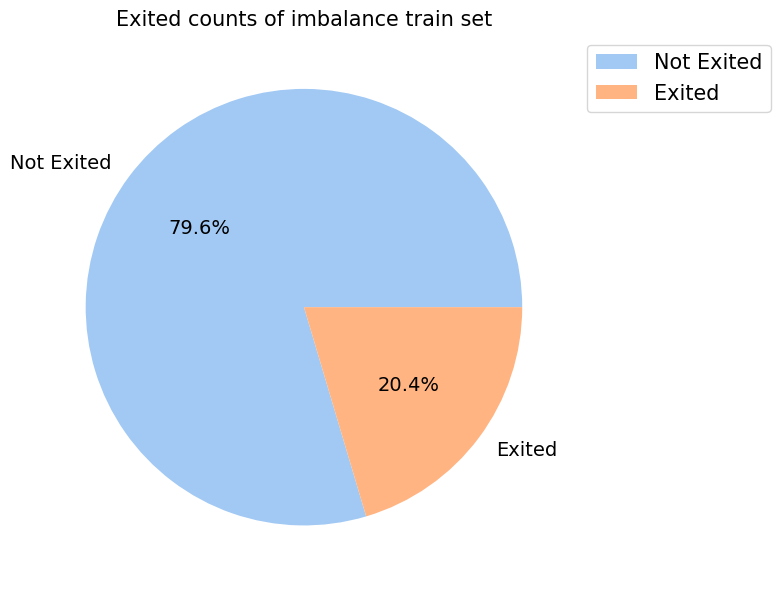

In [171]:
d1 = pd.DataFrame(y_train_ori.value_counts())
plt.figure(figsize=(10,6))
pal = sns.color_palette("pastel")
plt.pie(d1['Exited'], labels = ["Not Exited", "Exited"], colors=pal, autopct='%1.1f%%', textprops={'fontsize': 14})

plt.title("Exited counts of imbalance train set", fontsize = 15)
plt.legend(bbox_to_anchor=(1, 1) , prop={'size': 15})
plt.tight_layout()

plt.show()

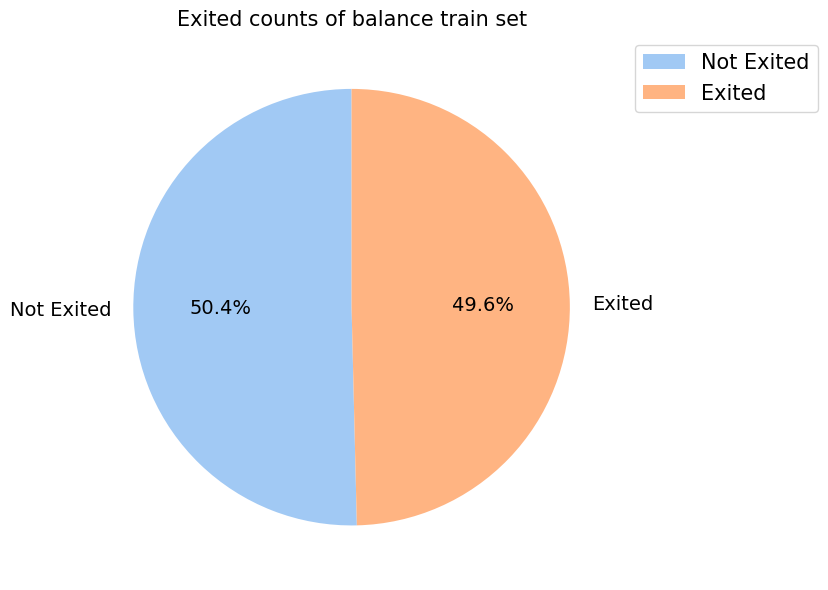

In [172]:
d2 = pd.DataFrame(y_train.value_counts())
plt.figure(figsize=(10,6))
pal = sns.color_palette("pastel")
plt.pie(d2['Exited'], labels = ["Not Exited", "Exited"], colors=pal, autopct='%1.1f%%',
            textprops={'fontsize': 14}, startangle=90)

plt.title("Exited counts of balance train set", fontsize = 15)
plt.legend(bbox_to_anchor=(1, 1) , prop={'size': 15})
plt.tight_layout()

plt.show()

# Standard Scaler

In [173]:
X_train_scale = X_train.copy()
X_test_scale = X_test.copy()

In [174]:
con_col = ["CreditScore","Age","Balance","EstimatedSalary"]

scaler = StandardScaler()
scaler.fit(X_train[con_col])
X_train_scale[con_col] = scaler.transform(X_train[con_col])
X_train_scale.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,France,Germany,Spain,Female,Male,HasCrCard_No,HasCrCard_Yes,IsActiveMember_0,IsActiveMember_Yes
0,0.206502,-0.698317,5,-1.300881,2,1.095344,0,0,1,1,0,0,1,1,0
1,-2.417941,0.109279,1,-0.073032,1,-0.752850,0,1,0,0,1,0,1,0,1
2,-1.236941,-1.203064,2,0.522156,1,1.472837,1,0,0,1,0,0,1,1,0
3,0.064345,-0.092620,5,0.413720,1,1.264807,0,0,1,0,1,0,1,1,0
4,2.207640,1.623520,8,0.755925,2,0.549330,0,0,1,1,0,0,1,0,1


In [175]:
X_test_scale[con_col] = scaler.transform(X_test[con_col])
X_test_scale.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,France,Germany,Spain,Female,Male,HasCrCard_No,HasCrCard_Yes,IsActiveMember_0,IsActiveMember_Yes
9394,-0.558960,-0.597367,8,0.826089,1,1.597892,0,1,0,1,0,0,1,0,1
898,-1.368164,-0.092620,2,0.369652,1,0.487054,1,0,0,1,0,0,1,1,0
2398,0.632974,0.109279,8,0.246665,1,-0.430177,0,0,1,1,0,0,1,0,1
5906,1.529659,-0.900215,4,0.517487,1,-0.194049,1,0,0,0,1,1,0,1,0
2343,0.632974,-0.294519,5,1.344180,2,0.607576,0,1,0,0,1,0,1,0,1


# 1. K-nearest neighbors

In [176]:
knn_parameters = {
    'n_neighbors': list(range(1,10)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_parameters, cv=5, scoring='accuracy')
knn_cv.fit(X_train_scale,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [177]:
print("Best parameters : ",knn_cv.best_params_)
print("Test accuracy :  {:.3f}".format(knn_cv.best_score_))
print("Train accuracy : {:.3f}".format(knn_cv.score(X_test_scale,y_test)))


Best parameters :  {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Test accuracy :  0.875
Train accuracy : 0.817


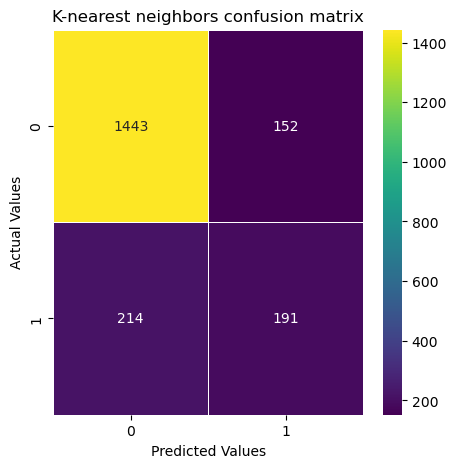

KNN_Precision_score :  0.557
KNN_Recall_score :  0.472
KNN_F1_score :  0.511


In [179]:
knn_y_pred = knn_cv.predict(X_test_scale)
knn_y_true = y_test
knn_cm = confusion_matrix(knn_y_true, knn_y_pred)

f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(knn_cm,annot = True, linewidths= 0.5, fmt=".0f", ax=ax, cmap = "viridis")
plt.title("K-nearest neighbors confusion matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

print("KNN_Precision_score :  {:.3f}".format(precision_score(knn_y_true,knn_y_pred)))
print("KNN_Recall_score :  {:.3f}".format(recall_score(knn_y_true,knn_y_pred)))
print("KNN_F1_score :  {:.3f}".format(f1_score(knn_y_true,knn_y_pred)))

# 2. RandomForest

In [180]:
forest_parameters = { 
    'n_estimators': [10,20,30,40,50],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,8,12,16],
    'criterion' :['gini', 'entropy']
}
forest_cv = RandomForestClassifier(random_state=1) 
forest_cv = GridSearchCV(forest_cv, forest_parameters, cv= 5, scoring='accuracy')
forest_cv.fit(X_train_scale, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 8, 12, 16],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [181]:
print("Best parameters : ",forest_cv.best_params_)
print("Test accuracy :  {:.3f}".format(forest_cv.best_score_))
print("Train accuracy : {:.3f}".format(forest_cv.score(X_test_scale,y_test)))

Best parameters :  {'criterion': 'gini', 'max_depth': 12, 'max_features': 'sqrt', 'n_estimators': 40}
Test accuracy :  0.888
Train accuracy : 0.849


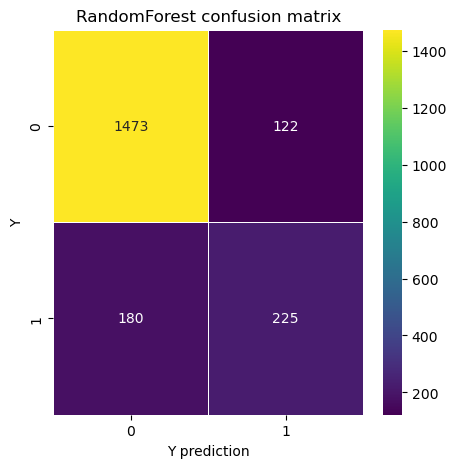

RandomForest_Precision_score :  0.648
RandomForest_Recall_score :  0.556
RandomForest_F1_score :  0.598


In [182]:
forest_y_pred = forest_cv.predict(X_test_scale)
forest_y_true = y_test
forest_cm = confusion_matrix(forest_y_true, forest_y_pred)

f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(forest_cm,annot = True, linewidths= 0.5, fmt=".0f", ax=ax, cmap = "viridis")
plt.title("RandomForest confusion matrix")
plt.xlabel("Y prediction")
plt.ylabel("Y")
plt.show()

print("RandomForest_Precision_score :  {:.3f}".format(precision_score(forest_y_true,forest_y_pred)))
print("RandomForest_Recall_score :  {:.3f}".format(recall_score(forest_y_true,forest_y_pred)))
print("RandomForest_F1_score :  {:.3f}".format(f1_score(forest_y_true,forest_y_pred)))

# 3. LogisticRegression

In [183]:
lr_parameters = {"penalty": ["l1", "l2"], "C": [0.001, 0.01, 0.1, 1, 10]}
lr = LogisticRegression(solver="liblinear", random_state=1, max_iter=10000)
lr_cv = GridSearchCV(lr, lr_parameters, cv=5, scoring='accuracy')
lr_cv.fit(X_train_scale, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, random_state=1,
                                          solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [184]:
print("Best parameters : ",lr_cv.best_params_)
print("Test accuracy :  {:.3f}".format(lr_cv.best_score_))
print("Train accuracy : {:.3f}".format(lr_cv.score(X_test_scale,y_test)))

Best parameters :  {'C': 10, 'penalty': 'l1'}
Test accuracy :  0.845
Train accuracy : 0.809


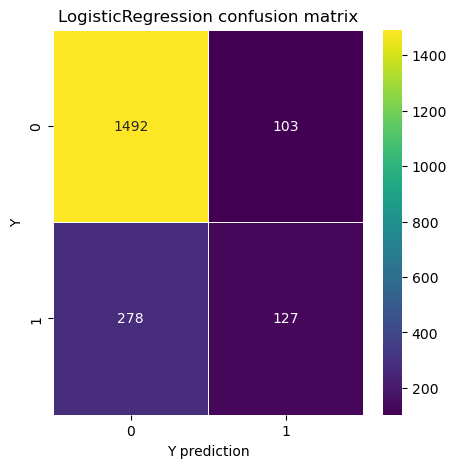

LogisticRegression_Precision_score :  0.552
LogisticRegression_Recall_score :  0.314
LogisticRegression_F1_score :  0.400


In [185]:
lr_y_pred = lr_cv.predict(X_test_scale)
lr_y_true = y_test
lr_cm = confusion_matrix(lr_y_true , lr_y_pred)

f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(lr_cm,annot = True, linewidths= 0.5, fmt=".0f", ax=ax, cmap = "viridis")
plt.title("LogisticRegression confusion matrix")
plt.xlabel("Y prediction")
plt.ylabel("Y")
plt.show()

print("LogisticRegression_Precision_score :  {:.3f}".format(precision_score(lr_y_true,lr_y_pred)))
print("LogisticRegression_Recall_score :  {:.3f}".format(recall_score(lr_y_true,lr_y_pred)))
print("LogisticRegression_F1_score :  {:.3f}".format(f1_score(lr_y_true,lr_y_pred)))

# 4. Decision Tree

In [186]:
tree_parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [10, 20, 30, 40, 50],
     'max_features': ['sqrt', 'log2'],
     'min_samples_leaf': [1, 2, 3, 4, 5]}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, tree_parameters, cv=5, scoring='accuracy')
tree_cv.fit(X_train_scale,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [187]:
print("Best parameters : ",tree_cv.best_params_)
print("Test accuracy :  {:.3f}".format(tree_cv.best_score_))
print("Train accuracy : {:.3f}".format(tree_cv.score(X_test_scale,y_test)))

Best parameters :  {'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'splitter': 'random'}
Test accuracy :  0.849
Train accuracy : 0.797


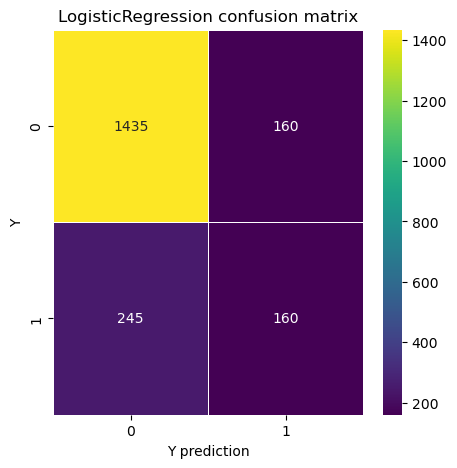

DecisionTree_Precision_score :  0.500
DecisionTree_Recall_score :  0.395
DecisionTree_F1_score :  0.441


In [188]:
tree_y_pred = tree_cv.predict(X_test_scale)
tree_y_true = y_test
tree_cm = confusion_matrix(tree_y_true, tree_y_pred)

f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(tree_cm,annot = True, linewidths= 0.5, fmt=".0f", ax=ax, cmap = "viridis")
plt.title("LogisticRegression confusion matrix")
plt.xlabel("Y prediction")
plt.ylabel("Y")
plt.show()

print("DecisionTree_Precision_score :  {:.3f}".format(precision_score(tree_y_true,tree_y_pred)))
print("DecisionTree_Recall_score :  {:.3f}".format(recall_score(tree_y_true,tree_y_pred)))
print("DecisionTree_F1_score :  {:.3f}".format(f1_score(tree_y_true,tree_y_pred)))

# 5. SVC

In [189]:
svc_parameters = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]}

svc = SVC(random_state=1)
svc_cv = GridSearchCV(svc, svc_parameters, cv=5, scoring='accuracy')
svc_cv.fit(X_train_scale,y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=1),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]},
             scoring='accuracy')

In [190]:
print("Best parameters : ",svc_cv.best_params_)
print("Test accuracy :  {:.3f}".format(svc_cv.best_score_))
print("Train accuracy : {:.3f}".format(svc_cv.score(X_test_scale,y_test)))

Best parameters :  {'C': 10, 'gamma': 0.1}
Test accuracy :  0.878
Train accuracy : 0.860


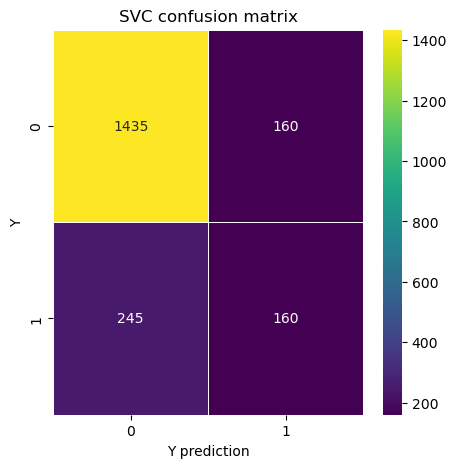

SVC_Precision_score :  0.691
SVC_Recall_score :  0.558
SVC_F1_score :  0.617


In [191]:
svc_y_pred = svc_cv.predict(X_test_scale)
svc_y_true = y_test
svc_cm = confusion_matrix(svc_y_true, svc_y_pred)

f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(tree_cm,annot = True, linewidths= 0.5, fmt=".0f", ax=ax, cmap = "viridis")
plt.title("SVC confusion matrix")
plt.xlabel("Y prediction")
plt.ylabel("Y")
plt.show()

print("SVC_Precision_score :  {:.3f}".format(precision_score(svc_y_true,svc_y_pred)))
print("SVC_Recall_score :  {:.3f}".format(recall_score(svc_y_true,svc_y_pred)))
print("SVC_F1_score :  {:.3f}".format(f1_score(svc_y_true,svc_y_pred)))

# Classification report

1. K-nearest neighbors

In [192]:
print(classification_report(knn_y_true,knn_y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      1595
           1       0.56      0.47      0.51       405

    accuracy                           0.82      2000
   macro avg       0.71      0.69      0.70      2000
weighted avg       0.81      0.82      0.81      2000



2. RandomForest

In [193]:
print(classification_report(forest_y_true,forest_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1595
           1       0.65      0.56      0.60       405

    accuracy                           0.85      2000
   macro avg       0.77      0.74      0.75      2000
weighted avg       0.84      0.85      0.84      2000



3. LogisticRegression

In [194]:
print(classification_report(lr_y_true,lr_y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1595
           1       0.55      0.31      0.40       405

    accuracy                           0.81      2000
   macro avg       0.70      0.62      0.64      2000
weighted avg       0.78      0.81      0.79      2000



4. DecistionTree

In [195]:
print(classification_report(tree_y_true,tree_y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1595
           1       0.50      0.40      0.44       405

    accuracy                           0.80      2000
   macro avg       0.68      0.65      0.66      2000
weighted avg       0.78      0.80      0.79      2000



5. SVC

In [196]:
print(classification_report(svc_y_true,svc_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1595
           1       0.69      0.56      0.62       405

    accuracy                           0.86      2000
   macro avg       0.79      0.75      0.77      2000
weighted avg       0.85      0.86      0.85      2000



# Result

In [197]:
print("Model Recall on test set")
d1 = {'Model': ["K-nearest neighbors","RandomForest","LogisticRegression",'DecisionTree','SVC'], 
      'Test Accuracy': [knn_cv.best_score_,forest_cv.best_score_,lr_cv.best_score_,tree_cv.best_score_,svc_cv.best_score_],
    'Train Accuracy': [knn_cv.score(X_test_scale,y_test),forest_cv.score(X_test_scale,y_test),
                       lr_cv.score(X_test_scale,y_test),tree_cv.score(X_test_scale,y_test),svc_cv.score(X_test_scale,y_test)],
    'F1 score': [f1_score(knn_y_true,knn_y_pred),f1_score(forest_y_true,forest_y_pred),f1_score(lr_y_true,lr_y_pred),
                  f1_score(tree_y_true,tree_y_pred),f1_score(svc_y_true,svc_y_pred)]}
    
df1 = pd.DataFrame(data=d1)
pd.set_option("display.max_colwidth", 10000)
df1 = df1.set_index('Model')
#df1.sort_values(by = ["Train Accuracy"],inplace=True,ascending=False)
df1 = df1.sort_values(by='Train Accuracy', ascending=False)
df1

Model Recall on test set


,Test Accuracy,Train Accuracy,F1 score
Model,,,
SVC,0.878146,0.8600,0.617486
RandomForest,0.888352,0.8490,0.598404
K-nearest neighbors,0.874562,0.8170,0.510695
LogisticRegression,0.844799,0.8095,0.400000
DecisionTree,0.849007,0.7975,0.441379


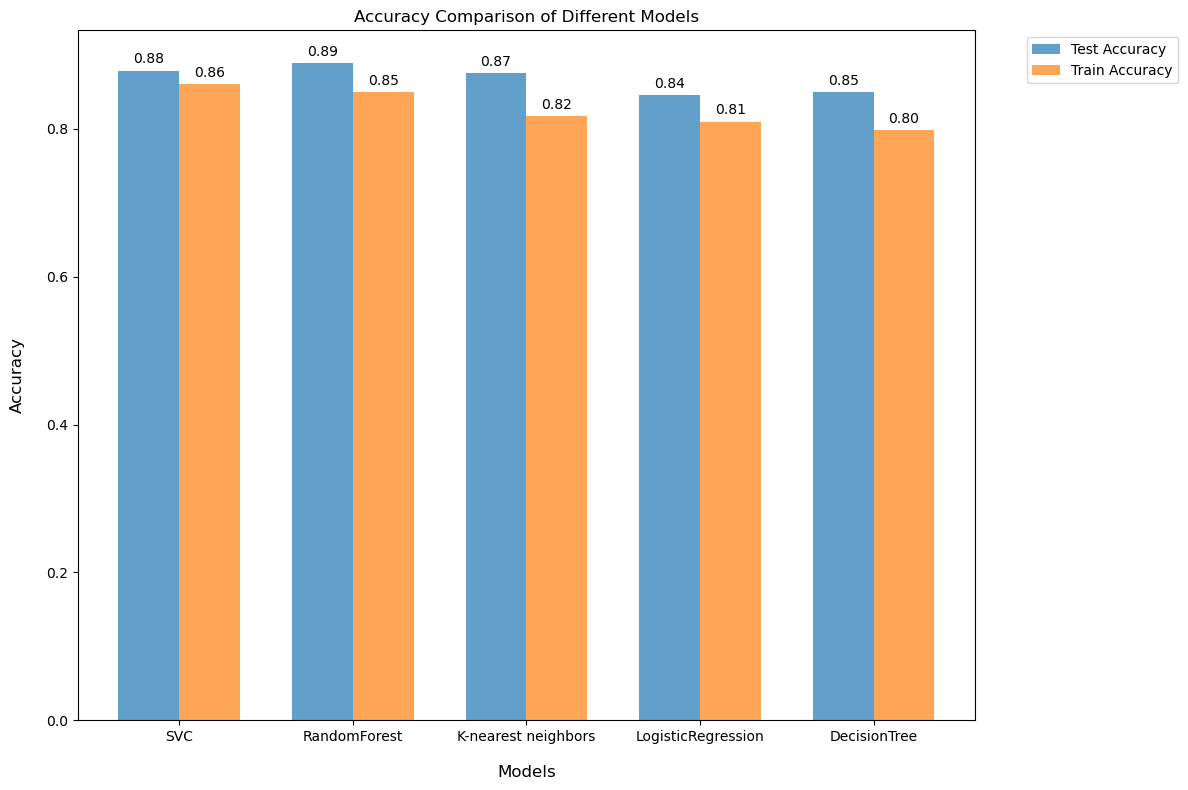

In [211]:
models = df1.index
test_accuracy = df1['Test Accuracy']
train_accuracy = df1['Train Accuracy']
bar_width = 0.35
index = np.arange(len(models))


plt.figure(figsize=(12,8))
plt.bar(index - bar_width/2, test_accuracy, bar_width, label='Test Accuracy', alpha=0.7)
plt.bar(index + bar_width/2, train_accuracy, bar_width, label='Train Accuracy', alpha=0.7)


for i, v in enumerate(test_accuracy):
    plt.text(i - bar_width/2, v + 0.01, f'{v:.2f}', color='black', ha='center')
for i, v in enumerate(train_accuracy):
    plt.text(i + bar_width/2, v + 0.01, f'{v:.2f}', color='black', ha='center')

plt.xlabel('Models', fontsize=12, labelpad=15)
plt.ylabel('Accuracy', fontsize=12, labelpad=15)
plt.title('Accuracy Comparison of Different Models')
plt.xticks(index, models)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


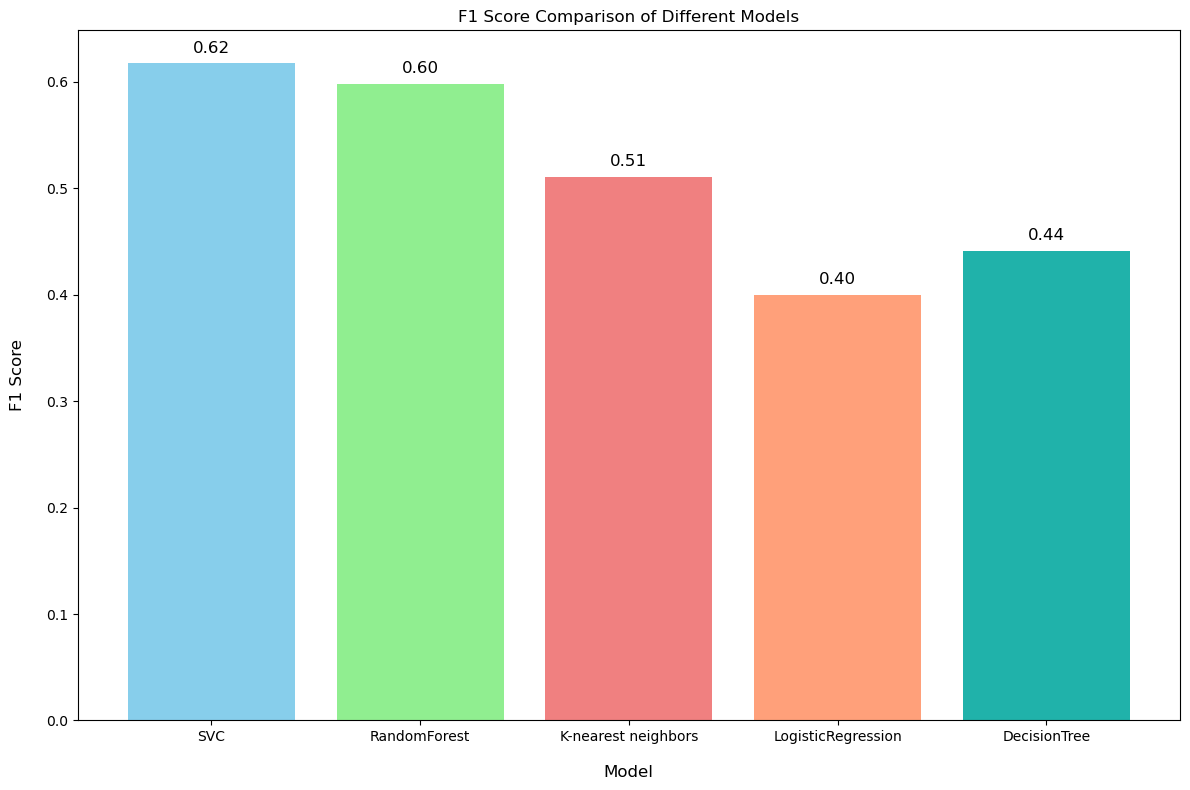

In [216]:
models = df1.index
f1_scores = df1['F1 score']

colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightseagreen']

plt.figure(figsize=(12, 8))
bars = plt.bar(models, f1_scores, color=colors)

plt.xlabel('Model', fontsize=12, labelpad=15)
plt.ylabel('F1 Score', fontsize=12, labelpad=15)
plt.title('F1 Score Comparison of Different Models')

for bar, score in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, score + 0.01, f'{score:.2f}', color='black', ha='center', fontsize=12)


plt.tight_layout()
plt.show()


__We can see that the model that best fits the data is SVC, with a train accuracy value of 0.8590 and an F1-score value of 0.6094, which is the highest of the 5 models, followed by K-nearest neighbors (k-NN), which It has similar performance to SVC, making it a good choice next to SVC.__